# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `itmal_l01_data.pkl', try reloading it..

In [3]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-43095.85

OK


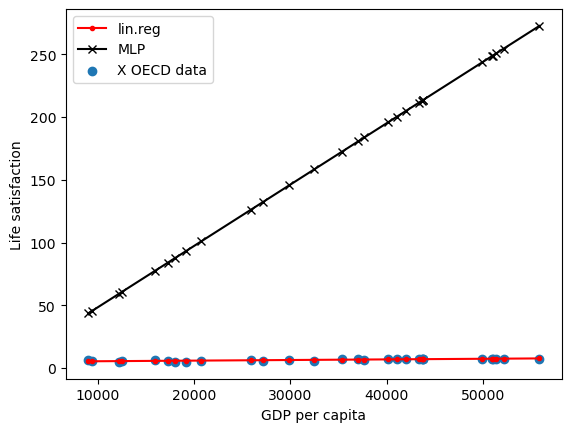

In [4]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

The MLP should no longer result in a bad R^2 score
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72

OK


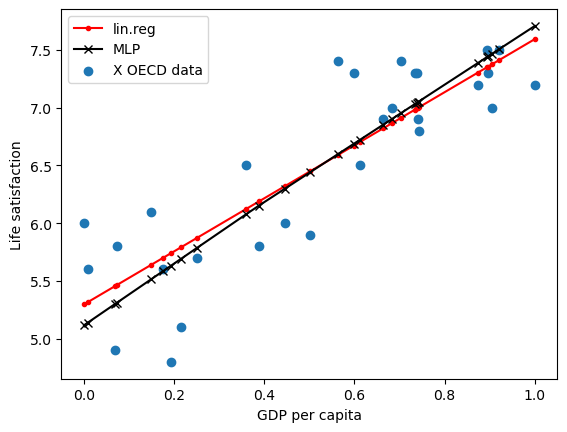

In [5]:
def manualScaler(X):
    X_min = np.min(X)
    X_max = np.max(X)
    s = X_max - X_min
    X_scaled = (X-X_min)/s
    return X_scaled

X_scaled = manualScaler(X)

mlp.fit(X_scaled,y)
linreg.fit(X_scaled, y)

print("The MLP should no longer result in a bad R^2 score")
PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")
print("\nOK")

### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

Now the MinMaxScalar method has been used: 
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.72


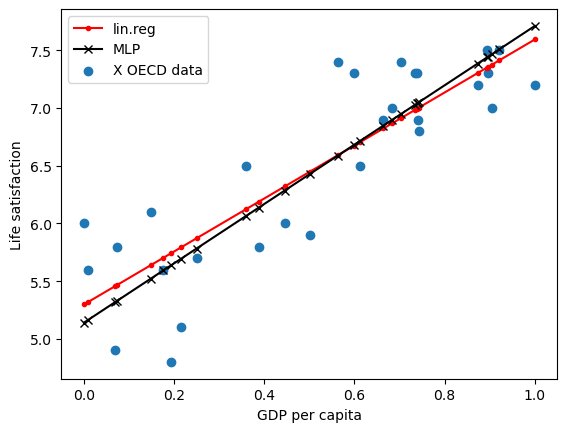

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

mlp.fit(X_scaled, y)
linreg.fit(X_scaled, y)

print("Now the MinMaxScalar method has been used: ")
PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")

Now a pipeline has been used with the MinMaxScalar
LinReg.score(X, y)=0.73
   MLP.score(X, y)=0.72


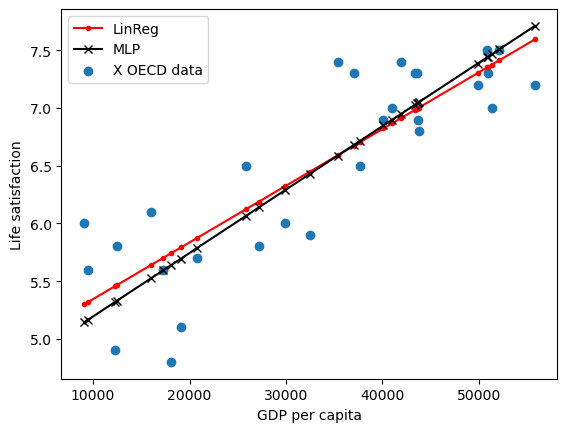

In [7]:
pipe = Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('mlp', mlp)
    ]
)

pipe.fit(X,y)
linreg.fit(X,y)

print("Now a pipeline has been used with the MinMaxScalar")
PlotModels(linreg, pipe, X, y, "LinReg", "MLP")

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

Now a pipeline has been used with the StandardScalar
LinReg.score(X, y)=0.73
   MLP.score(X, y)=0.80


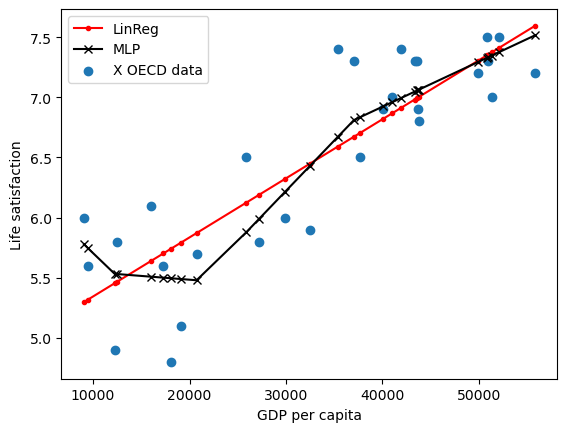

In [8]:
from sklearn.preprocessing import StandardScaler

pipeStandard = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('mlp',mlp)
    ]
)

pipeStandard.fit(X,y)
linreg.fit(X,y)

print("Now a pipeline has been used with the StandardScalar")
PlotModels(linreg, pipeStandard, X, y, "LinReg", "MLP")

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p.333-334 [HOML,2nd], p.358-359 [HOML,3rd]) and the ELU activation function (p.336 [HOML,2nd], p.363 [HOML,3rd).

[OPTIONAL 1]: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

[OPTIONAL 2]: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

[OPTIONAL 3]: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

The hyperparameter we're testing is the amount of neuron. Based on the tests below, we can see that if the amount of neurons exceed 450, the score falls and also if the amount of neurons is below 450 the score also falls. 

Also we can see that if the amount of neurons is around 250 - 200 the score is also decent. But when it gets below 200, the score drops drastically. 







Testing with hidden_layer_sizes=(1000,)
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.44

Testing with hidden_layer_sizes=(600,)


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.57

Testing with hidden_layer_sizes=(500,)
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.50

Testing with hidden_layer_sizes=(450,)


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.56

Testing with hidden_layer_sizes=(400,)
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.54

Testing with hidden_layer_sizes=(250,)


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.49

Testing with hidden_layer_sizes=(200,)
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.42

Testing with hidden_layer_sizes=(150,)


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-0.11

Testing with hidden_layer_sizes=(100,)
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-7.53

Testing with hidden_layer_sizes=(10,)


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-54.76


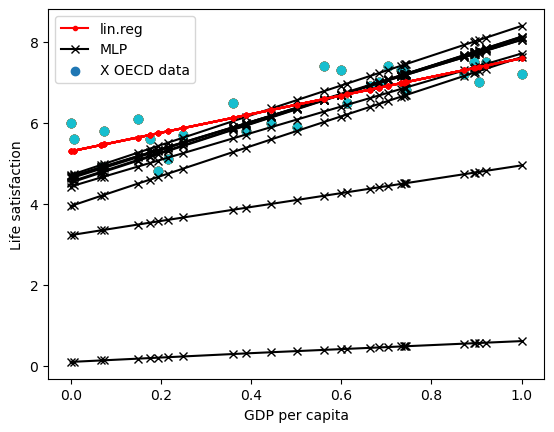

In [16]:
# Example 1: Testing with different numbers of neurons
#! This code is taken from the exercise description, it had 1000, 100, 10 neurons at the start.
#! We'll be adding more of our
for neurons in [(1000,), (600,), (500,), (450,), (400,), (250,), (200,), (150,), (100,), (10,)]:
    print(f"\nTesting with hidden_layer_sizes={neurons}")
    mlp = MLPRegressor(hidden_layer_sizes=neurons)
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    mlp.fit(X_scaled, y)
    linreg.fit(X_scaled,y)
    PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")
    



This time we're testing with different activation functions on a specific amount of neurons that's set to 250.

Based on the test we can see that all of them score alright, ranging between 0.53 - 0.61. Where the identity actication function scores the highest score. The logistic function performs the worst of them all with this amount of neurons.  


Testing with activation=identity
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.61

Testing with activation=logistic


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.14

Testing with activation=tanh
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.55

Testing with activation=relu


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.53


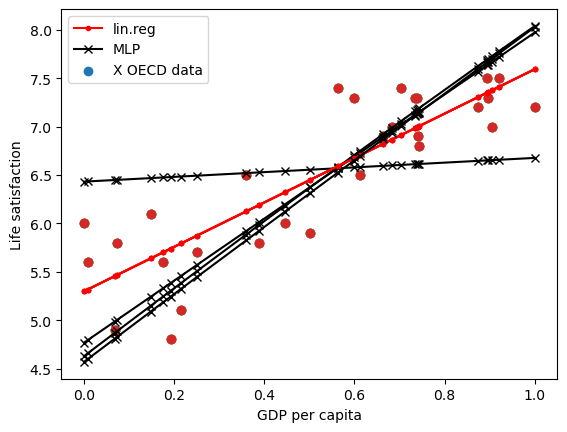

In [20]:
# Example 2: Testing with different activation functions
for activation_functions in ["identity", "logistic", "tanh", "relu"]:
    print(f"\nTesting with activation={activation_functions}")
    mlp = MLPRegressor(hidden_layer_sizes=250, activation=activation_functions)
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    mlp.fit(X_scaled, y)
    linreg.fit(X_scaled,y)
    PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")

Now we're experimenting with different solvers. The amount of neurons is 250 and we're using the default activation function which is relu.

Here we see that with the lbfgs solver, the score function gets up on 0.82, which is really high. The sgd solver is at 0.14, while the adam solver is at 0.40. 


Testing with solvers=lbfgs
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.82

Testing with solvers=sgd
lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.14

Testing with solvers=adam


c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lin.reg.score(X, y)=0.73
    MLP.score(X, y)=0.40


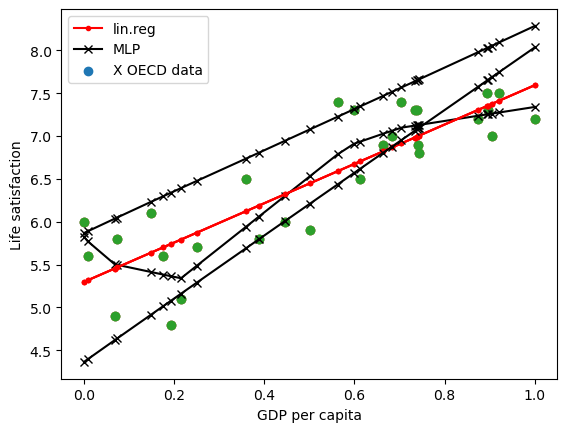

In [21]:
# Example 3: Testing with different solvers
for solvers in ["lbfgs", "sgd", "adam"]:
    print(f"\nTesting with solvers={solvers}")
    mlp = MLPRegressor(hidden_layer_sizes=250, solver=solvers)
    scaler = MinMaxScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    mlp.fit(X_scaled, y)
    linreg.fit(X_scaled,y)
    PlotModels(linreg, mlp, X_scaled, y, "lin.reg", "MLP")

REVISIONS||
:-|:-|
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02-10| CEF, updated for SWMAL F22.
2023-02-19| CEF, updated for SWMAL F23, adjuste page numbers for 3rd.ed.
2023-02-21| CEF, added types, rewrote CalcPredAndScore and added isNumpyData.